# Einlesen der Daten und erster Überblick

In [1]:
import pandas as pd
daten = pd.read_csv('d14.csv')  

In [2]:
daten

,Name,Energie,Fett,FS,Kohlenhydrate,Zucker,Eisweiss,Salz,Label
0,Apfel,52,0.2,0.0,13.8,11.0,0.3,0.00,1
1,Waffel,459,24.3,12.7,53.0,33.8,7.5,0.30,0
2,Spiegelei,204,17.1,6.1,1.0,1.0,11.4,0.54,1
3,Chips,503,28.0,2.6,53.0,2.9,6.3,2.80,0
4,Fritierte Pommes,289,14.0,1.3,36.0,0.3,3.4,0.70,0
5,Sahnebonbons,424,8.4,5.7,86.9,71.6,0.3,1.00,0
6,Brotscheibe,229,4.9,0.8,35.0,2.3,7.7,1.03,1
7,Schokomuesli,406,11.3,4.7,60.7,22.2,10.7,0.25,0
8,Chicken Nuggets,241,11.0,1.5,21.0,0.5,14.0,0.98,0
9,Banane,95,0.3,0.1,21.0,12.0,1.1,0.10,1


# Entscheidungsbaum mit allen Daten für ersten Überblick

In [3]:
import sklearn.tree
import matplotlib

### Wähle Parameter für Entscheidungsbaum

In [7]:
attribute  = ["Energie"] 
tiefe_baum = 1

### Erstelle Baum


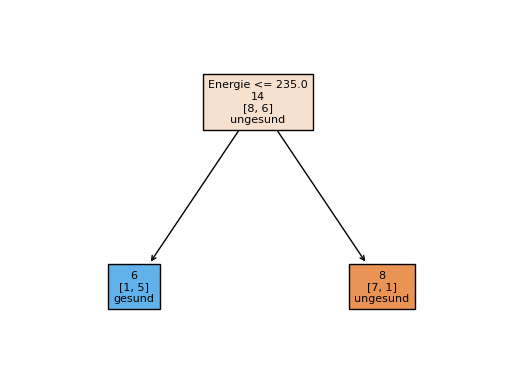

In [8]:
baum = sklearn.tree.DecisionTreeClassifier( random_state=0, max_depth=tiefe_baum)
baum.fit( daten[attribute], daten["Label"] )
sklearn.tree.plot_tree( baum, feature_names=attribute, label=None, filled=True,
                        class_names=["ungesund","gesund"], impurity=False,
                        proportion=False, fontsize=8 )
matplotlib.pyplot.show()

# Validierung

In [9]:
categorized_correct = 0
for i in daten.index:
    if( baum.predict(daten.loc[[i]][attribute]) == (daten.loc[i]['Label']) ):
        categorized_correct += 1
    else:
        print("falsch klassifiziert: ", i, daten.loc[i]['Name'])
print( "Anzahl  korrekt klassifiziert: ", categorized_correct )    
print( "Prozent korrekt klassifiziert: ", categorized_correct/len(daten)*100, "%")
print( "Anzahl  falsch klassifiziert: ", len(daten) - categorized_correct )    
print( "Prozent falsch klassifiziert: ", (len(daten) - categorized_correct)/len(daten)*100, "%")

falsch klassifiziert:  10 Gouda
falsch klassifiziert:  12 Ketchup
Anzahl  korrekt klassifiziert:  12
Prozent korrekt klassifiziert:  85.71428571428571 %
Anzahl  falsch klassifiziert:  2
Prozent falsch klassifiziert:  14.285714285714285 %
